In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# 1. Memuat dataset MNIST dan membuat data loader

In [2]:

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 64
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



100%|██████████| 9912422/9912422 [00:00<00:00, 102735221.32it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31562192.24it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28527374.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5452355.11it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# 2. Visualisasi beberapa gambar MNIST

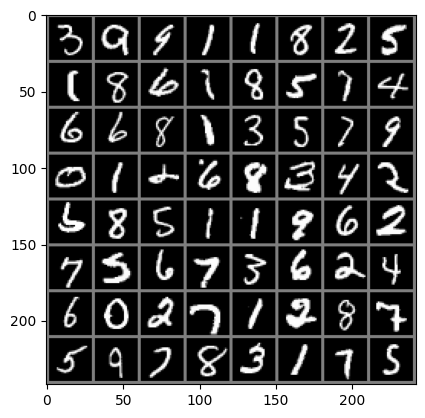

Labels: tensor([3, 9, 9, 1, 1, 8, 2, 5, 1, 8, 6, 1, 8, 5, 7, 4, 6, 6, 8, 1, 3, 5, 7, 9,
        0, 1, 2, 6, 8, 3, 4, 2, 6, 8, 5, 1, 1, 9, 6, 2, 7, 5, 6, 7, 3, 6, 2, 4,
        6, 0, 2, 7, 1, 2, 8, 7, 5, 9, 7, 8, 3, 1, 7, 5])


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

# 3. Desain model Neural Network

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

net = Net()

# 4. Setup hyperparameter

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 5. Training loop

In [9]:
num_epochs = 5
for epoch in range (num_epochs):
  running_loss = 0.0
  for i, data in enumerate (train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion (outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print (f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')
print('Finished Training')

Epoch 1, Loss: 0.807504930857148
Epoch 2, Loss: 0.3725617041847091
Epoch 3, Loss: 0.326497111755457
Epoch 4, Loss: 0.30068398265442103
Epoch 5, Loss: 0.28090716863491894
Finished Training


# 6. Evaluasi Model

In [12]:
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net (images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    all_labels.extend(labels.numpy())
    all_preds.extend(predicted.numpy())

accuracy = correct/total
confusion = confusion_matrix(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score (all_labels, all_preds, average ='weighted')
recall = recall_score (all_labels, all_preds, average='weighted')

print (f'Accuracy: {accuracy}')
print (f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.9237
F1 Score: 0.9234644787874143
Precision: 0.923723530555037
Recall: 0.9237
Confusion Matrix:
[[ 965    0    3    2    0    4    4    1    1    0]
 [   0 1109    2    2    0    1    4    2   15    0]
 [  11   13  917   14   12    2   12   14   31    6]
 [   3    1   18  926    0   23    1   14   14   10]
 [   1    4    3    1  912    0    9    2    5   45]
 [   9    3    5   39    9  770   15    7   26    9]
 [  15    3    4    1   13   12  904    3    3    0]
 [   1    9   21    6    5    0    0  948    3   35]
 [  11   12    5   17    8   17   12   10  869   13]
 [  11   10    1   10   30    4    1   18    7  917]]


# 7. Penjelasan

Nilai akurasi yang didapatkan adalah 92,37%. Selain itu didapatlan nilai f1 score, prcision, dan recall yang hampir sama yaitu 92%. Nilai tersebut menunjukan bahwa model dapat mengklasifikasikan tulisan tangan dalam dataset MNIST dengan baik.